

========================================== Find MST ==========================================


          graph:
                 inf    8   16    8   13  inf  
                   8  inf  inf    6   18    8  
                  16  inf  inf  inf  inf   14  
                   8    6  inf  inf  inf    7  
                  13   18  inf  inf  inf  inf  
                 inf    8   14    7  inf  inf  




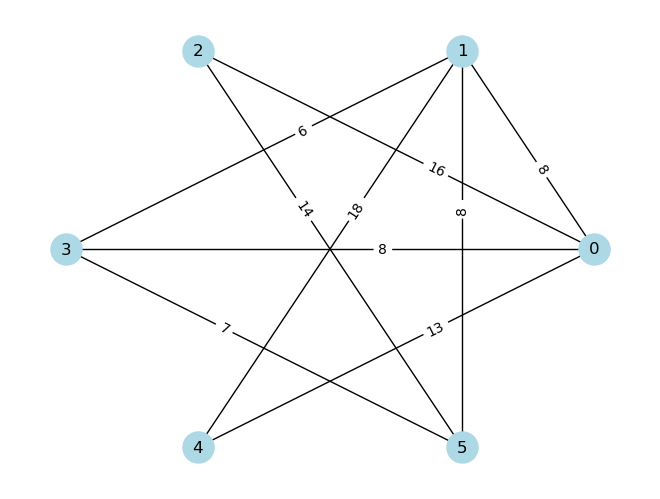



------------------------------------------- Start -------------------------------------------


remaining_nodes: {0, 1, 2, 3, 4, 5}
            MST:
                 inf  inf  inf  inf  inf  inf  
                 inf  inf  inf  inf  inf  inf  
                 inf  inf  inf  inf  inf  inf  
                 inf  inf  inf  inf  inf  inf  
                 inf  inf  inf  inf  inf  inf  
                 inf  inf  inf  inf  inf  inf  


      MST_nodes: {0}
      MST_edges: set()


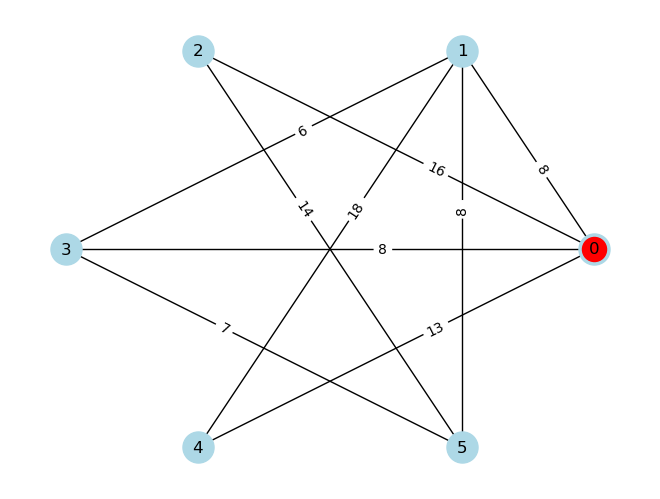

---------------------------------------------------------------------------------------------


remaining_nodes: {1, 2, 3, 4, 5}
neighbour_edges: {(0, 1), (0, 2), (0, 3), (0, 4)}
        minEdge: (0, 1)
   minEdge_dist: 8
  minEdge_node1: 0
  minEdge_node2: 1
            MST:
                 inf    8  inf  inf  inf  inf  
                   8  inf  inf  inf  inf  inf  
                 inf  inf  inf  inf  inf  inf  
                 inf  inf  inf  inf  inf  inf  
                 inf  inf  inf  inf  inf  inf  
                 inf  inf  inf  inf  inf  inf  


      MST_nodes: {0, 1}
      MST_edges: {(0, 1)}


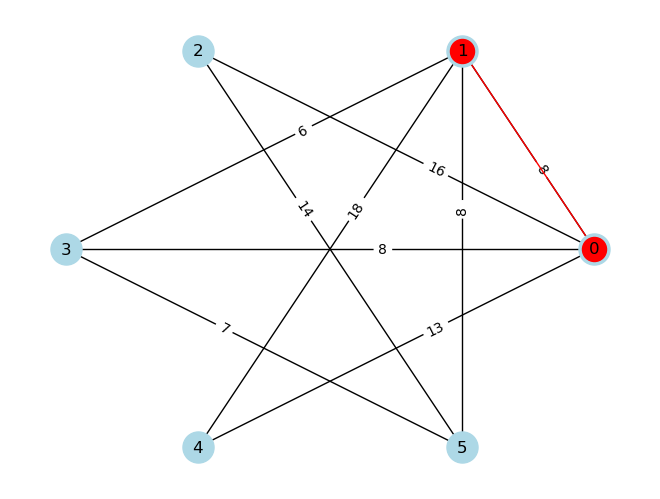

---------------------------------------------------------------------------------------------


remaining_nodes: {2, 3, 4, 5}
neighbour_edges: {(0, 4), (1, 5), (0, 3), (1, 4), (0, 2), (1, 3)}
        minEdge: (1, 3)
   minEdge_dist: 6
  minEdge_node1: 1
  minEdge_node2: 3
            MST:
                 inf    8  inf  inf  inf  inf  
                   8  inf  inf    6  inf  inf  
                 inf  inf  inf  inf  inf  inf  
                 inf    6  inf  inf  inf  inf  
                 inf  inf  inf  inf  inf  inf  
                 inf  inf  inf  inf  inf  inf  


      MST_nodes: {0, 1, 3}
      MST_edges: {(0, 1), (1, 3)}


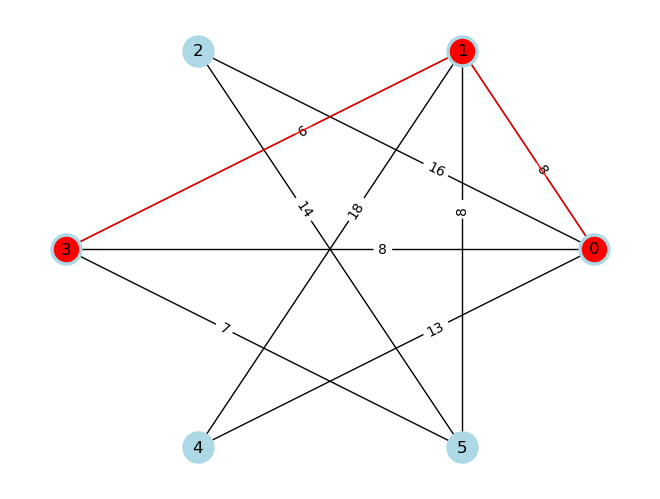

---------------------------------------------------------------------------------------------


remaining_nodes: {2, 4, 5}
neighbour_edges: {(0, 4), (1, 5), (1, 4), (0, 2), (3, 5)}
        minEdge: (3, 5)
   minEdge_dist: 7
  minEdge_node1: 3
  minEdge_node2: 5
            MST:
                 inf    8  inf  inf  inf  inf  
                   8  inf  inf    6  inf  inf  
                 inf  inf  inf  inf  inf  inf  
                 inf    6  inf  inf  inf    7  
                 inf  inf  inf  inf  inf  inf  
                 inf  inf  inf    7  inf  inf  


      MST_nodes: {0, 1, 3, 5}
      MST_edges: {(0, 1), (1, 3), (3, 5)}


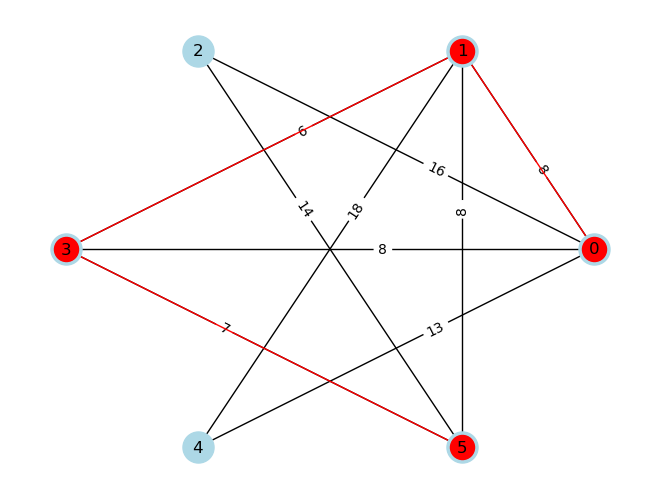

---------------------------------------------------------------------------------------------


remaining_nodes: {2, 4}
neighbour_edges: {(0, 2), (0, 4), (1, 4), (5, 2)}
        minEdge: (0, 4)
   minEdge_dist: 13
  minEdge_node1: 0
  minEdge_node2: 4
            MST:
                 inf    8  inf  inf   13  inf  
                   8  inf  inf    6  inf  inf  
                 inf  inf  inf  inf  inf  inf  
                 inf    6  inf  inf  inf    7  
                  13  inf  inf  inf  inf  inf  
                 inf  inf  inf    7  inf  inf  


      MST_nodes: {0, 1, 3, 4, 5}
      MST_edges: {(0, 1), (1, 3), (3, 5), (0, 4)}


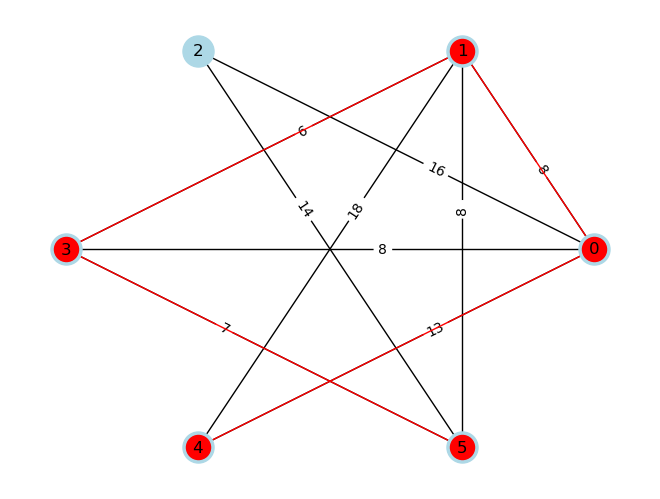

---------------------------------------------------------------------------------------------


remaining_nodes: {2}
neighbour_edges: {(0, 2), (5, 2)}
        minEdge: (5, 2)
   minEdge_dist: 14
  minEdge_node1: 5
  minEdge_node2: 2
            MST:
                 inf    8  inf  inf   13  inf  
                   8  inf  inf    6  inf  inf  
                 inf  inf  inf  inf  inf   14  
                 inf    6  inf  inf  inf    7  
                  13  inf  inf  inf  inf  inf  
                 inf  inf   14    7  inf  inf  


      MST_nodes: {0, 1, 2, 3, 4, 5}
      MST_edges: {(0, 1), (0, 4), (1, 3), (3, 5), (5, 2)}


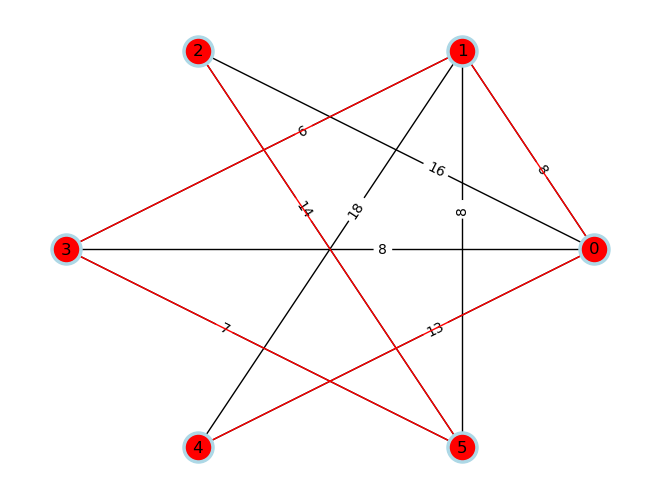

---------------------------------------------------------------------------------------------



traverse_path: [0, 1, 3, 5, 2, 4]

tsp_path: [0, 1, 3, 5, 2, 4]


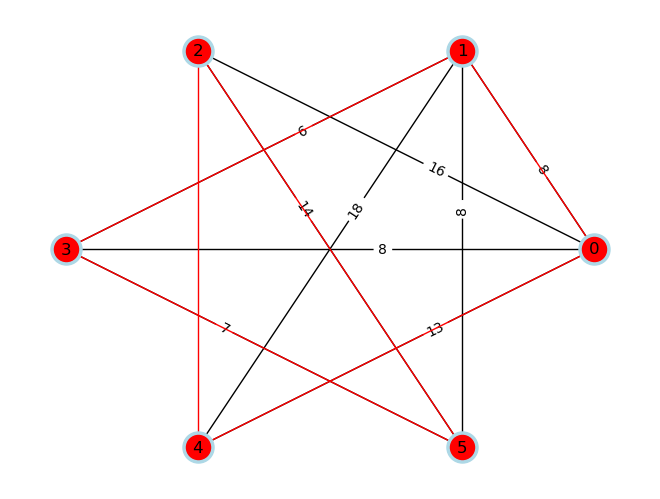


TSP Solution: [0, 2, 5, 3, 1, 4]


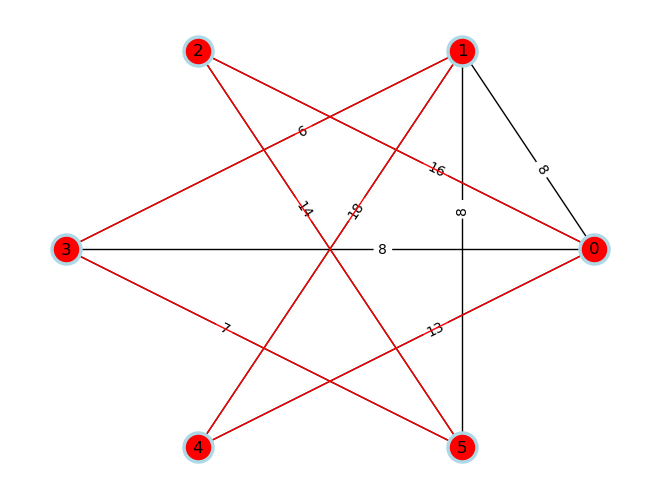

In [1]:
from tsp_test_cases import build_tests
from math import inf, isinf
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

def transform_graph(graph):

    N = len(graph)
    new_graph = []
    for i in range(N):
        row = []
        for j in range(N):
            if graph[i][j] == inf:
                row.append(0)
            else:
                row.append(graph[i][j])
        new_graph.append(row)
    return new_graph


def transform_path(path):
    
    N = len(path)
    new_path = []
    for i in range(N):
        if path[i] == inf:
            new_path.append(0)
        else:
            new_path.append(path[i])
    return new_path


def visualize_graph(
        graph_: list[list], 
        highlight_subgraph: list = [], 
        is_path: bool = True,
        highlight_nodes: list = [],
    ) -> None:

    assert len(graph_) != 0

    N = len(graph_)
    graph = transform_graph(graph_)
    adj_mtx  = np.array(graph)
    G = nx.from_numpy_array(adj_mtx)
    pos = nx.circular_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.6)
    
    if len(highlight_subgraph) != 0:
    
        path_edges = []

        if is_path:
            edges_nodes = transform_path(highlight_subgraph)
            edges_nodes.append(edges_nodes[0])
            path_edges = list(zip(edges_nodes, edges_nodes[1:]))
        
        else:
            subgraph = transform_graph(highlight_subgraph)    
            for i in range(N):
                for j in range(i+1, N):
                    if subgraph[i][j] != 0:
                        path_edges.append((i,j))

        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red')

    if len(highlight_nodes) != 0:
        nx.draw_networkx_nodes(G, pos, nodelist=highlight_nodes, node_color='red')

    plt.show()

def print_mtx(name, graph):
    print(f'{name:>15}:')
    N = len(graph)
    for row in range(N):
        blank = '                 '
        print(blank, end='')
        for col in range(N):
            print(f'{graph[row][col]:>3}', end='  ')
        print()
    print('\n')
        

def min_spanning_tree(graph: list[list]) -> list[list]:
    """
    Constructs a minimum spanning tree (MST) of the given graph using a greedy algorithm (Prim's algorithm).
    """
    
    print('\n\n========================================== Find MST ==========================================\n\n')

    N = len(graph)
    
    print_mtx('graph', graph)
    visualize_graph(graph)

    MST_nodes = set()
    MST_edges = set()
    MST_nodes.add(0)
    neighbours_edges = set()
    remaining_nodes = set(range(N))
    MST = [[inf for col in range(N)] for row in range(N)]  # Initialize MST matrix

    print('\n\n------------------------------------------- Start -------------------------------------------\n\n')
    print(f'remaining_nodes: {remaining_nodes}')
    print_mtx('MST', MST)
    print(f'      MST_nodes: {MST_nodes}')
    print(f'      MST_edges: {MST_edges}')
    visualize_graph(graph, MST, False, MST_nodes)

    while len(remaining_nodes) != 0:
        
        print('---------------------------------------------------------------------------------------------\n\n')
        
        remaining_nodes -= MST_nodes
        
        print(f'remaining_nodes: {remaining_nodes}')
        
        neighbours_edges.clear()

        # 1. Find neighbour edges
        for node in MST_nodes:
            for rNode in remaining_nodes:
                if not isinf(graph[node][rNode]):
                    neighbours_edges.add( (node, rNode) )

        print(f'neighbour_edges: {neighbours_edges}')
        
        # 2. Find the shortes neighbour edge
        minEdge = (0, 0)
        minEdge_dist = inf
        minEdge_node1 = -1
        minEdge_node2 = -1
        for currEdge in neighbours_edges:
            currNode1 = currEdge[0]
            currNode2 = currEdge[1]
            currEdge_dist = graph[currNode1][currNode2]
            if currEdge_dist < minEdge_dist:
                minEdge       = currEdge
                minEdge_dist  = currEdge_dist
                minEdge_node1 = currNode1
                minEdge_node2 = currNode2
        
        MST_edges.add(minEdge)
        print(f'        minEdge: {minEdge}')
        print(f'   minEdge_dist: {minEdge_dist}')
        print(f'  minEdge_node1: {minEdge_node1}')
        print(f'  minEdge_node2: {minEdge_node2}')


        # 3. Add new node in MST
        if minEdge_node2 not in MST_nodes:
            MST_nodes.add(minEdge_node2)
            remaining_nodes.remove(minEdge_node2)
        else:
            MST_nodes.add(minEdge_node1)
            remaining_nodes.remove(minEdge_node1)

        MST[minEdge_node1][minEdge_node2] = minEdge_dist
        MST[minEdge_node2][minEdge_node1] = minEdge_dist

        print_mtx('MST', MST)
        print(f'      MST_nodes: {MST_nodes}')
        print(f'      MST_edges: {MST_edges}')
        visualize_graph(graph, MST, False, MST_nodes)

    return MST


def depth_first_search(tree: list, path=[0]):
    """
    Performs a depth-first traversal on the given tree.
    """
    n = len(tree)
    result = path
    s = path[-1]  # Current node

    # Explore all unvisited neighbors of the current node
    for t in (set(range(n)) - set(path)):
        if t not in path and not isinf(tree[s][t]):  # Check if edge exists
            result.append(t)
            result = depth_first_search(tree, result)
    return result

def remove_duplicate_nodes(path):
    """
    Removes duplicate nodes from a given path while maintaining the order.
    """
    tsp_path, seen = [], []  # Initialize the resulting path and a list to track seen nodes

    for node in path:
        # If the node hasn't been seen before, add it to the result and mark it as seen
        if node not in seen:
            tsp_path.append(node)
            seen.append(node)
    
    return tsp_path

def main():
    filename = 'tsp_test_cases'
    tests = build_tests(filename)
    N = len(tests) 
    i = 0
    graph, sol = tests[i]

    T = min_spanning_tree(graph)

    print('---------------------------------------------------------------------------------------------\n\n')
    traverse_path = depth_first_search(T)
    print(f'\ntraverse_path: {traverse_path}')

    tsp_path = remove_duplicate_nodes(traverse_path)
    print(f'\ntsp_path: {tsp_path}')

    visualize_graph(graph, tsp_path, True, list(range(len(graph))))

    print(f'\nTSP Solution: {sol}')
    visualize_graph(graph, sol, True, list(range(len(graph))))

if __name__ == '__main__':
    main()

In [2]:
import time
import matplotlib.pyplot as plt
from tsp_general import distance
from matplotlib.ticker import MultipleLocator

def compare_tsp_algos( fname: str, algos: list, names: list, if_plt: bool) -> None:

    count = 0
    tests = build_tests( fname )
    nodes_numbers = []
    running_times = []
    approx_ratios = []

    for test in tests:

        graph, sol = test
        nodes_num = len(graph)
        
        print('------------------ ' + f'Test No.{count+1}' + ' ------------------\n')
        print(f'graph: ')
        for row in graph: 
            print(f'       {row}')
        print(f'\nsolution: {sol}\n\n')

        nodes_numbers.append( nodes_num )
        case_running_times = []

        for i in range( len(algos) ):

            startT   = time.process_time()
            sol_algo = algos[i]( graph )
            endT     = time.process_time()
            elapT    = endT - startT

            case_running_times.append( elapT )

            minDist      = distance(sol, graph)
            minDist_algo = distance(sol_algo, graph)
            correctness  = True if minDist == minDist_algo else False

            if  names[i] != 'TSP-Approximation': # TSP algorithms

                print(
                    f'algorithm:    {names[i]}',
                    f'correctness:  {correctness}',
                    f'runningTime:  {elapT:.10f}',
                    f'distance:     {distance(sol_algo, graph)}',
                    sep = '\n',
                    end = '\n\n'                
                )
            
            else: # TSP Approximation
                
                ratio = float(minDist) / float(minDist_algo)
                approx_ratios.append(ratio)

                print(
                    f'algorithm:    {names[i]}',
                    f'runningTime:  {elapT:.10f}',
                    f'distance:     {distance(sol_algo, graph)}',
                    f'ratio:        {ratio}',
                    sep = '\n',
                    end = '\n\n'                
                )
        
        running_times.append( case_running_times )
        count += 1


    if if_plt:

        N = len(algos)
        fig, ax1 = plt.subplots(figsize=(10, 6))

        # Running Times
        ax1.set_xlabel('Graph Size')
        ax1.set_ylabel('Running Time (seconds)')
        running_times = list(zip(*running_times))  # Transpose for easier plotting
        for i in range(N - 1):
            ax1.plot(nodes_numbers, running_times[i], label=names[i], marker='o')
        ax1.grid(True)
        ax1.legend(loc="upper left")
        
        # Approximation
        ax2 = ax1.twinx()
        ax2.set_ylabel('Ratio of (Solution distance / Approximated distance)')
        plt.plot(nodes_numbers, approx_ratios, label=names[N-1], marker='o', linestyle='--', color='grey')
        ax2.legend(loc='upper center')
        ax2.set_ylim(-7,5)

        # Show graph
        plt.title('Running Time Comparison of TSP Algorithms')
        plt.tight_layout()
        plt.show()        